In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import visualkeras
from PIL import ImageFont

In [4]:
cifar10 = datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print("Shape of the training data : ",x_train.shape)
print("Shape of the testing data : ",x_test.shape)

Shape of the training data :  (50000, 32, 32, 3)
Shape of the testing data :  (10000, 32, 32, 3)


In [5]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

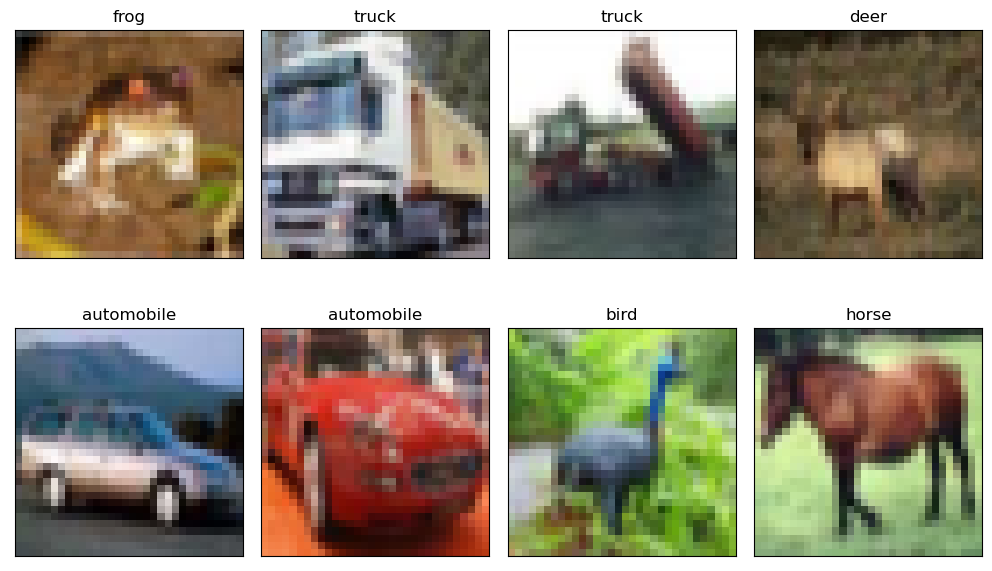

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(10,8))
axes = axes.ravel()

for i in range(8):
    axes[i].imshow(x_train[i], cmap=plt.cm.binary)
    axes[i].set_title(class_names[ y_train[i][0]])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    fig.tight_layout(pad=1)
plt.show()  

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
epoch = 40
batch_size = 64
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

History = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=epoch, batch_size = batch_size)

loss,accuracy = model.evaluate(x_test,y_test)
print("Loss",loss)
print("accuracy",accuracy)

Epoch 1/40
782/782 [==============================] - 102s 128ms/step - loss: 1.7058 - accuracy: 0.3603 - val_loss: 1.3229 - val_accuracy: 0.5181
Epoch 2/40
782/782 [==============================] - 104s 133ms/step - loss: 1.2944 - accuracy: 0.5342 - val_loss: 1.1440 - val_accuracy: 0.5888
Epoch 3/40
782/782 [==============================] - 74s 94ms/step - loss: 1.1332 - accuracy: 0.6016 - val_loss: 0.9733 - val_accuracy: 0.6596
Epoch 4/40
782/782 [==============================] - 75s 96ms/step - loss: 1.0227 - accuracy: 0.6382 - val_loss: 0.9552 - val_accuracy: 0.6599
Epoch 5/40
782/782 [==============================] - 76s 97ms/step - loss: 0.9422 - accuracy: 0.6730 - val_loss: 0.8761 - val_accuracy: 0.6927
Epoch 6/40
782/782 [==============================] - 74s 95ms/step - loss: 0.8845 - accuracy: 0.6920 - val_loss: 0.8386 - val_accuracy: 0.7054
Epoch 7/40
782/782 [==============================] - 74s 95ms/step - loss: 0.8360 - accuracy: 0.7082 - val_loss: 0.7707 - val_accur

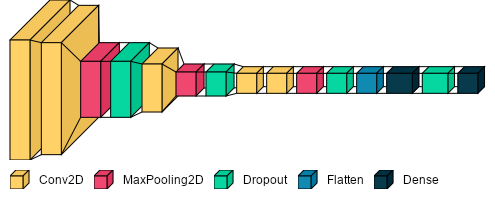

In [13]:
font = ImageFont.truetype("arial.ttf", 12)  
visualkeras.layered_view(model, legend=True, font=font) 

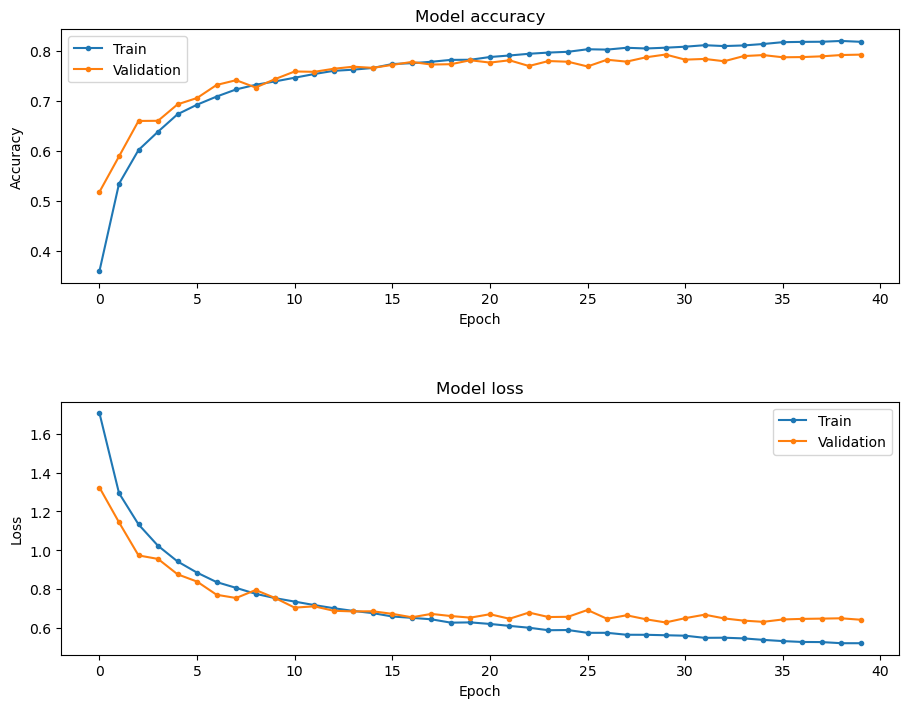

In [47]:
fig, ax = plt.subplots(2, figsize = (10,8))
ax[0].plot(History.history['accuracy'],marker = '.')
ax[0].plot(History.history['val_accuracy'] , marker = '.')
ax[0].set_title('Model accuracy')
ax[0].set(ylabel = 'Accuracy')
ax[0].set(xlabel = 'Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')
ax[1].plot(History.history['loss'],marker = '.')
ax[1].plot(History.history['val_loss'] , marker = '.')
ax[1].set_title('Model loss')
ax[1].set(ylabel = 'Loss')
ax[1].set(xlabel = 'Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')
fig.tight_layout(pad=4)
plt.show()


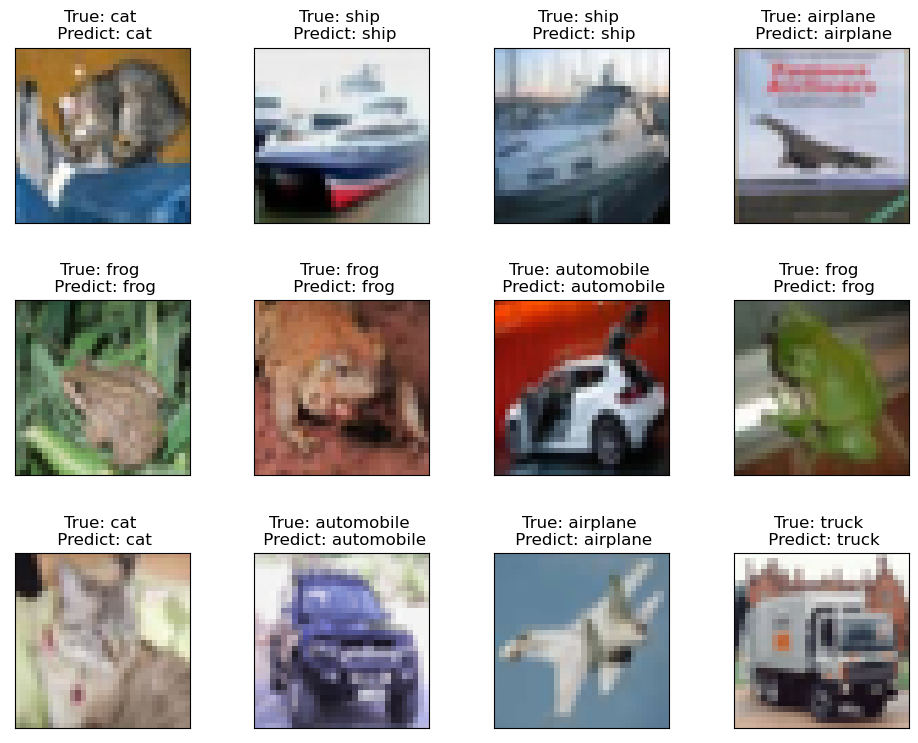

In [25]:
fig, axes = plt.subplots(3, 4, figsize=(10,8))
axes = axes.ravel()

for i in range(12):
    axes[i].imshow(x_test[i], cmap=plt.cm.binary)
    prediction = model.predict(np.array([x_test[i]]), verbose = 0)
    index = np.argmax(prediction)
    axes[i].set_title("True: %s \n Predict: %s" % (class_names[ y_test[i][0]], class_names[index]))
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    fig.tight_layout(pad=3)
plt.show()  

Prediction is horse


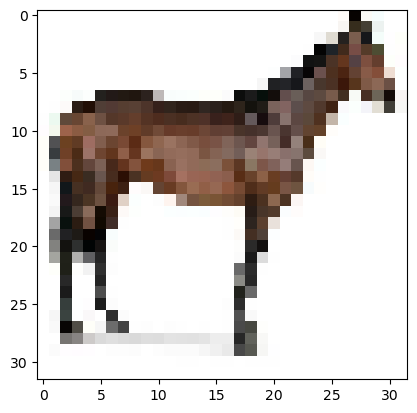

In [27]:
img = cv2.imread('C:/Users/kwarg/Downloads/horse.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32,32))
plt.imshow(img,cmap=plt.cm.binary)     
img = tf.keras.utils.normalize(img, axis=1)
prediction = model.predict(np.array([img]), verbose = 0)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}') 

In [15]:
model.save('cifar_image_classification.model')

INFO:tensorflow:Assets written to: cifar_image_classification.model\assets


INFO:tensorflow:Assets written to: cifar_image_classification.model\assets
